# implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
class kohonen:

    def __init__(self, M, N, X):
        self.M = M
        self.N = N
        self.learning_rate = 0.1
        self.input_dim = X.shape[1]
        minimum = np.min(X, axis=0)
        maximum = np.max(X, axis=0)
        self.weights = np.random.uniform(0, 1, (self.input_dim, M, N))
        for i in range(self.input_dim):
            self.weights[i] = minimum[i] + (maximum[i] - minimum[i]) * self.weights[i]

    def gauss_neighborhood(self, t, T):
        return np.exp(-t / T)

    # def mexican_hat_neighborhood(self, t, T):
    #     return np.exp(-t / T) * (1 - 2 * t / T)

    def euclidean_distance(self, x, y):
        return np.linalg.norm(x - y)

    def slow_down(self, t, iteration_num):
        return self.learning_rate * np.exp(-t / iteration_num)

    def train(self, X, max_epochs):
        for epoch in range(max_epochs):
            X = np.random.permutation(X)
            for x in X:
                bmu = None
                bmu_distance = np.inf
                for i in range(self.M):
                    for j in range(self.N):
                        distance = self.euclidean_distance(x, self.weights[:, i, j])
                        if distance < bmu_distance:
                            bmu_distance = distance
                            bmu = (i, j)

                for i in range(self.M):
                    for j in range(self.N):
                        distance = self.euclidean_distance(
                            np.array(bmu), np.array([i, j])
                        )
                        self.weights[:, i, j] += (
                            self.slow_down(epoch, max_epochs)
                            * self.gauss_neighborhood(distance, max(self.M, self.N))
                            * (x - self.weights[:, i, j])
                        )

    def predict(self, X):
        return np.array(
            [
                [
                    np.argmin(
                        [
                            self.euclidean_distance(x, self.weights[:, i, j])
                            for i in range(self.M)
                            for j in range(self.N)
                        ]
                    )
                    for x in X
                ]
            ]
        ).T

In [8]:
X = pd.DataFrame(np.random.uniform(-1, 4, (10, 2)), columns=["x", "y"]).to_numpy()

In [9]:
koch = kohonen(10, 10, X)

Text(0, 0.5, 'y')

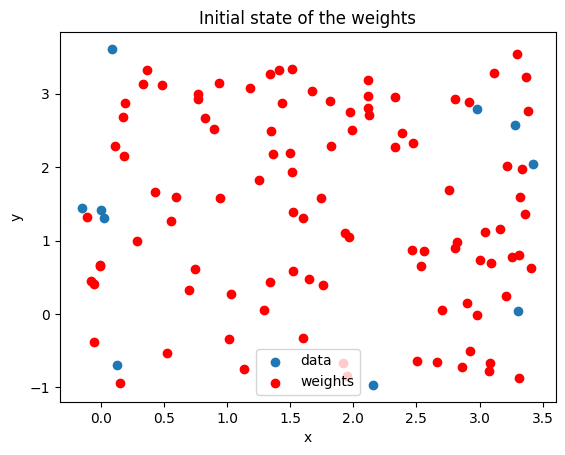

In [11]:
# plot scater plot of x
plt.scatter(X[:, 0], X[:, 1], label="data")
plt.scatter(koch.weights[0], koch.weights[1], c="red", label="weights")
plt.legend()
plt.title("Initial state of the weights")
plt.xlabel("x")
plt.ylabel("y")

In [12]:
cube = pd.read_csv("./../data/kohonen/cube.csv")

In [13]:
cube

,x,y,z,c
0,0.187781,0.239537,0.382492,0
1,-1.308979,-0.143321,-0.966648,0
2,-0.987613,0.679918,-0.037552,0
3,0.924980,0.607235,-0.146856,0
4,-0.098663,0.004329,-0.588876,0
...,...,...,...,...
1195,2.740583,3.037202,2.723101,7
1196,2.303258,4.337946,2.798172,7
1197,3.528407,4.575523,1.406155,7
1198,2.236023,3.901189,1.529630,7


In [14]:
cube_x = cube.drop("c", axis=1).to_numpy()
cube_x

array([[ 0.18778137,  0.23953673,  0.38249179],
       [-1.30897874, -0.14332141, -0.96664771],
       [-0.98761285,  0.67991821, -0.03755176],
       ...,
       [ 3.5284065 ,  4.57552275,  1.40615516],
       [ 2.2360228 ,  3.90118929,  1.52962956],
       [ 2.73583781,  4.30638078,  2.09750075]])

In [85]:
kohon = kohonen(2, 4, cube_x)
print(kohon.weights)

[[[-1.71809391  0.43836144 -1.48064045  3.76220907]
  [ 4.7957563   4.30437982  1.04024417  3.8921913 ]]

 [[ 0.77415185  2.89246057  0.75518226 -0.66546427]
  [ 6.0406084   2.5407059   3.67959005  3.48077668]]

 [[ 0.1702993   1.7799262   0.03615767  3.10631091]
  [ 0.13279165  1.56042999  3.38760162  1.18124916]]]


In [86]:
kohon.train(cube_x, 100)

In [87]:
cube["predicted"] = kohon.predict(cube_x)

In [88]:
cube

,x,y,z,c,predicted
0,0.187781,0.239537,0.382492,0,7
1,-1.308979,-0.143321,-0.966648,0,7
2,-0.987613,0.679918,-0.037552,0,7
3,0.924980,0.607235,-0.146856,0,7
4,-0.098663,0.004329,-0.588876,0,7
...,...,...,...,...,...
1195,2.740583,3.037202,2.723101,7,0
1196,2.303258,4.337946,2.798172,7,0
1197,3.528407,4.575523,1.406155,7,0
1198,2.236023,3.901189,1.529630,7,0


In [89]:
from sklearn.metrics import v_measure_score

v_measure_score(cube["c"], cube["predicted"])

0.7693572081482147